<a href="https://colab.research.google.com/github/Sakshi101214/MLT/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Week-3

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [2]:
np.random.seed(0)
# This ensures reproducibility. Setting the seed makes the random number
# generation deterministic, so the same "random" data will be generated every time you run the code.

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))
# np.random.randn(N//3, 2) generates (N//3) (666 points, approximately one-third of N) samples from a standard normal distribution (mean=0, std=1) for 2 dimensions.
# + np.array([2, 2]) shifts the cluster center to (2, 2) in 2D space.


In [3]:
X=X.T

## Problem 1
How many samples are there in the dataset?



## Solution

In [ ]:
# Enter your solution here
X.shape[1]

1998

## Problem 2

How many features are there in the dataset?


## Solution

In [ ]:
# Enter your solution here
X.shape[0]

2

## Problem 3
Plot the dataset using matplotlib.



## Solution

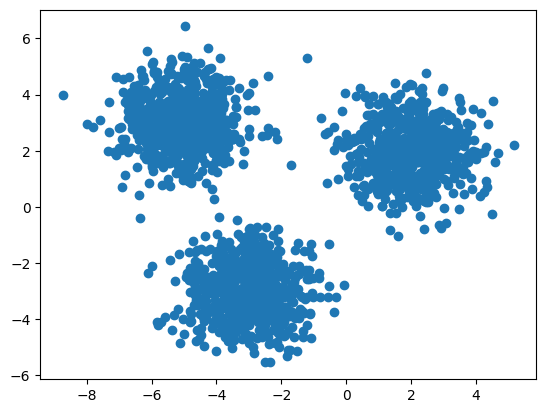

In [ ]:
# Enter your solution here
plt.scatter(X[0,:],X[1,:]);

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [4]:
# Enter your code here
k=3
c1=X[:,200]
c2=X[:,800]
c3=X[:,1200]
mus=np.array([c1,c2,c3]).T

In [5]:
mus.shape
# cluster centers
# [x1,x2,x3]
# [y1,y2,y3]
# cluster_centers: Array of shape
# (
# 𝑑
# ,
# 𝑘
# )
# (d,k) representing the
# 𝑘
# k cluster centers.


(2, 3)

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [ ]:
# cluster_centers(denoted as mus)
z=np.zeros(X.shape[1])
# z=[0,0,0,0,0,0,....1998]
def assign_clusters(X, k, cluster_centers):

  d,n=X.shape
  for i in range(n):

    z[i]=np.argmin(np.linalg.norm(mus-X[:,i].reshape(d,1),axis=0))

  return z

z=assign_clusters(X, k, mus)
z.mean()
# X[:, i].reshape(d, 1) reshapes the
# i-th point into a column vector.
# cluster_centers - X[:, i].reshape(d, 1) computes the vector difference between the point and each cluster center.

0.7107107107107107

## Problem 5

Plot the data points, with different color for different clusters.


## Solution

array([0., 0., 0., ..., 1., 1., 1.])

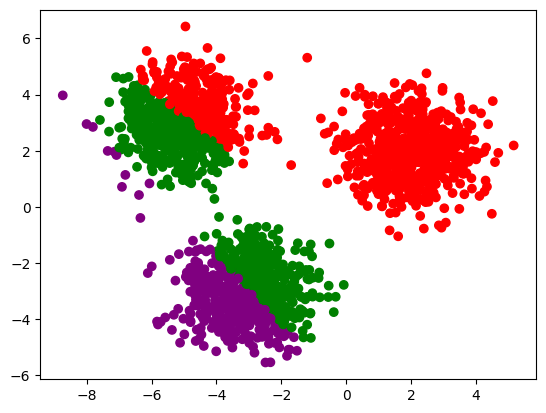

In [ ]:
# Enter your solution here
def plot(z):
  # z has float values like 1.0 It convert z to int array
  z=z.astype(int)
  colors=np.array(['red','green','purple'])
  plt.scatter(X[0,:],X[1,:],c=colors[z])

plot(z)
z

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [ ]:
# Enter your solution here

def compute_cluster_centers(X, z, k):

  for j in range(k):
    if np.any(X[:,z==j]):
      mus[:,j]=X[:,z==j].mean(axis=1)
  return mus

mus=compute_cluster_centers(X, z, k)

mus.mean(axis=1)

array([-2.55251646, -0.19225194])

## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

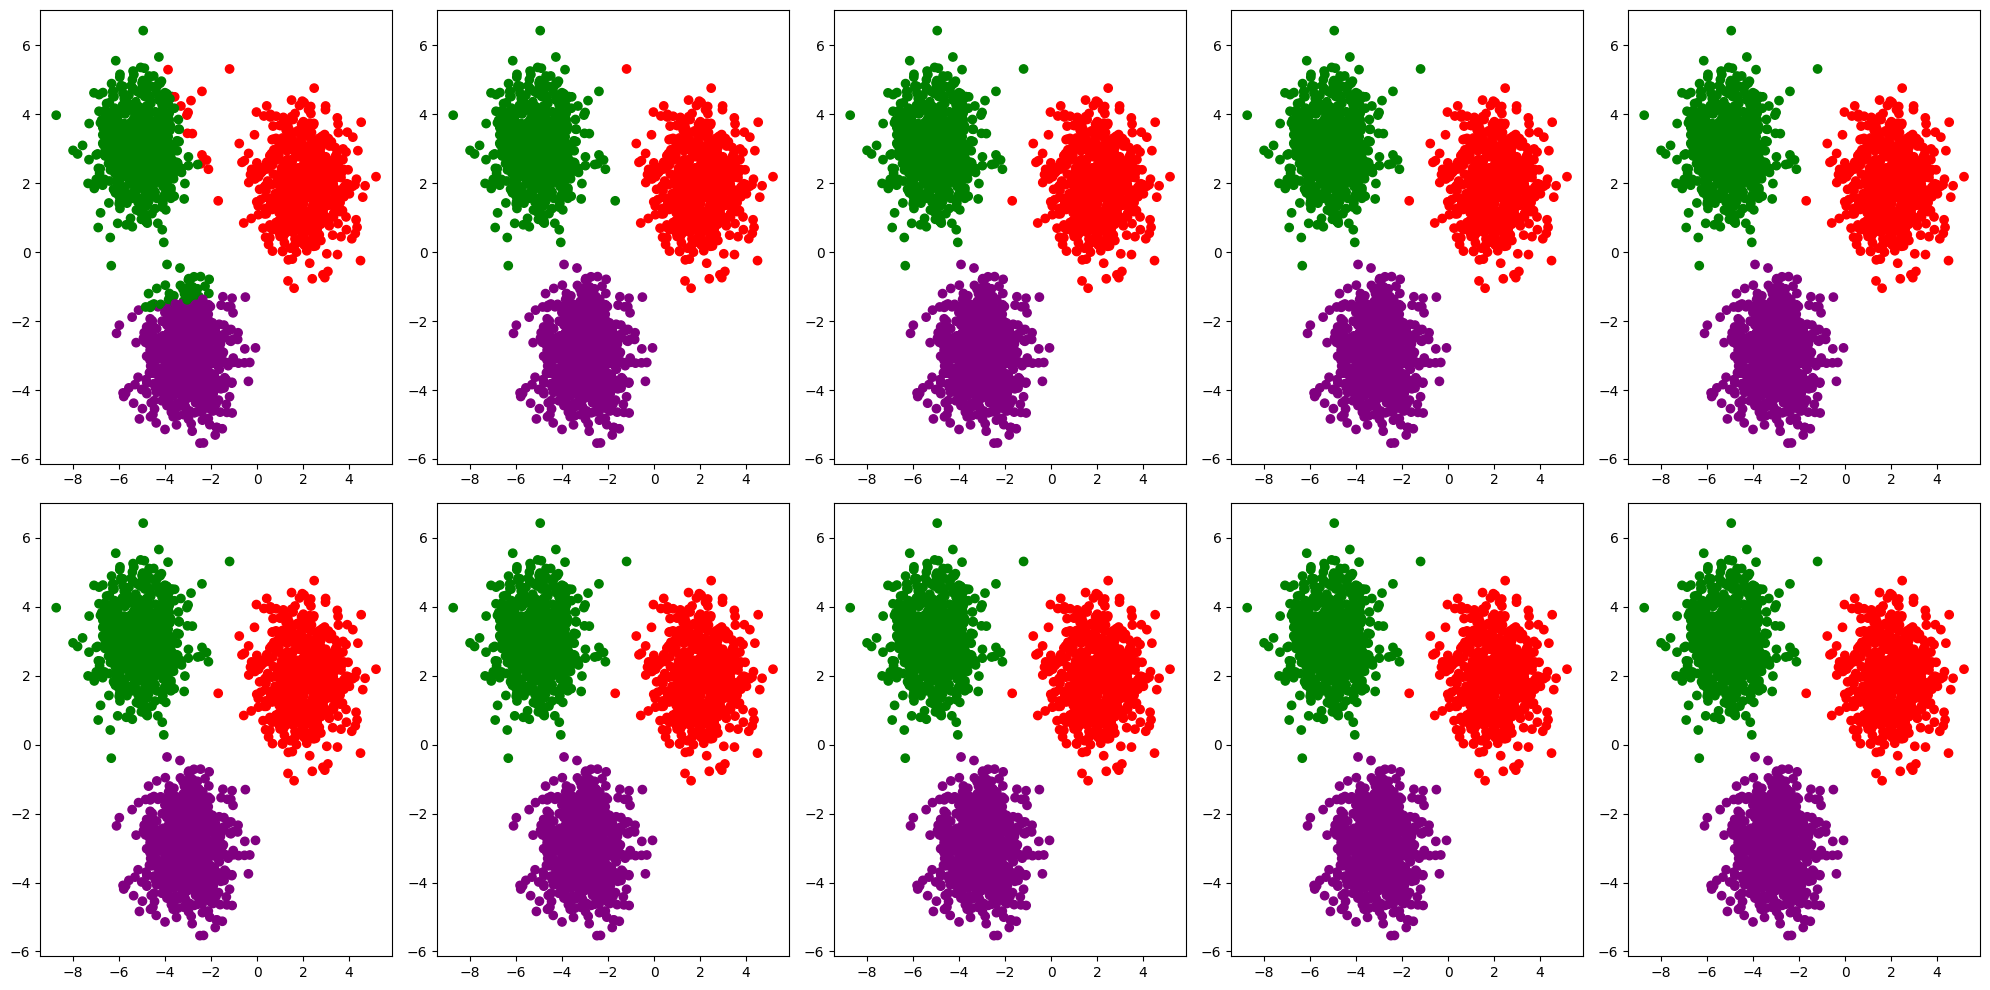

In [ ]:
# Adjust figure size
plt.figure(figsize=(20, 10))  # Set the figure size (width, height)

for i in range(10):
  z = assign_clusters(X, k, mus)

  # Create subplots
  plt.subplot(2, 5, i + 1)
  # 2 rows 5 column
  plot(z)

  mus = compute_cluster_centers(X, z, k)

plt.tight_layout()  # Optional: Adjust subplots to fit nicely within the figure
plt.show()  # Display the figure

